# AB-Testing
Kasus yang akan digunakan adalah membuka akun deposit untuk nasabah bank. Pada kesempatan kali ini data scientist diminta tolong untuk menganalisa hasil ab-testing suatu perusahaan bank. Apakah jumlah campaign mampu meningkatkan keinginan user untuk membuka akun deposit atau tidak?

Data yang digunakan berasal dari folder bank.zip file yang digunakan 
adalah bank-full.csv

1. Untuk variabel jumlah campaign bisa dicek untuk kolom campaign 
2. untuk variabel apakah akhirnya user membuka akun atau tidak bisa menggunakan variabel y

In [42]:
bank = pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 1. Pemahaman konsep A/B Testing

#### a. Apa nama experimentnya?

menganalisis dengan AB Testing mengenai pengaruh jumlah campaign terhadap keinginan user untuk membuka akun deposit atau tidak

#### b. Definisikan Hipotesis

semakin banyak campaign yang dilakukan terhadap user maka kemungkinan user akan membuka akun semakin tinggi.

#### c. Siapa participant-nya?

User (nasabah bank)

#### d. Variabel yang akan diuji apa?

Jumlah campaign 

#### e. Metrics apa yang akan digunakan?

**Macroconversions:** jumlah campaign per nasabah

**Microconversions:** jumlah nasabah yang diberi campaign

#### f. Berapa sample size dan durasi experiment?

In [43]:
a = bank.shape[0]
alpha = 0.05
sample = a / (1+ a * alpha**2)
sample

396.4920742803271

In [44]:
sample_size = bank.groupby(['y']).apply(lambda x: x.sample(n=200,random_state=123))
sample_size['y'].value_counts()

no     200
yes    200
Name: y, dtype: int64

Jumlah **sample size** yang dibutuhkan ada **400 sample**, dengan 200 untuk group yang yes dan 200 untuk gruop yang no. Sedangkan untuk **durasi experiment akan dilakukan selama 7 hari**

### 2. Pengujian Hipotesis

#### a. Penentuan hipotesis

Apakah jumlah campaign mampu meningkatkan keinginan user untuk membuka akun deposit atau tidak?

H0: rata-rata jumlah campaign user/nasabah yang membuka akun **sama** dengan yang tidak membuka akun  <br>
H1: rata-rata jumlah campaign user/nasabah yang membuka akun **berbeda** dengan yang tidak membuka akun

#### b. Pengujian yang digunakan

menggunakan T-test untuk kategori **membuka akun (yes)** dan **tidak membuka akun (no)**. 

#### c. Deteksi asumsi beserta cara penanganannya

In [45]:
yes = bank[bank['y']=='yes']
no = bank[bank['y']=='no']
print('rata-rata untuk kategori yang membuka akun:',yes['campaign'].mean())
print('rata-rata untuk kategori yang tidak membuka akun:',no['campaign'].mean())

rata-rata untuk kategori yang membuka akun: 2.1410474569861977
rata-rata untuk kategori yang tidak membuka akun: 2.8463503832473322


(0.0, 10.0)

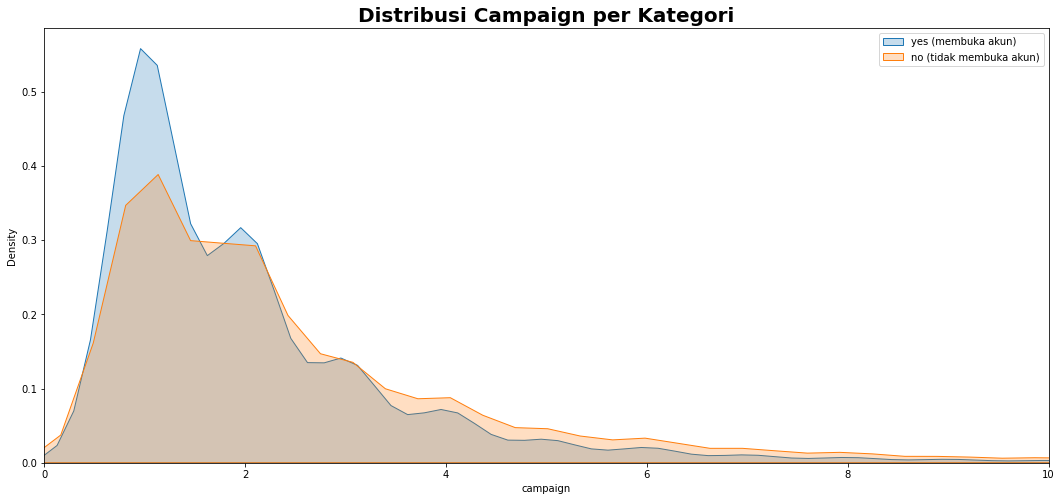

In [46]:
plt.figure(figsize=(18,8))

sns.kdeplot(yes['campaign'],label = 'yes (membuka akun)',shade = 'blue')
sns.kdeplot(no['campaign'], label = 'no (tidak membuka akun)',shade = 'red')
plt.title('Distribusi Campaign per Kategori',fontsize = 20,fontweight='bold')
plt.legend()
plt.xlim(0,10)

In [47]:
print('Jumlah data:',bank.shape[0])

Jumlah data: 45211


#### d. Hasil pengujian hipotesis


In [48]:
a, b= st.mannwhitneyu(yes['campaign'],no['campaign'])
alpha = 0.05
print('P-Value :',b)

if p_value >= alpha:
    print('Tidak cukup bukti jumlah campaign bisa bedakan user untuk membuka akun atau tidak membuka akun')
else:
    print('cukup bukti jumlah campaign bisa bedakan user untuk membuka akun atau tidak membuka akun')

P-Value : 9.742452436952554e-72
Tidak cukup bukti jumlah campaign bisa bedakan user untuk membuka akun atau tidak membuka akun


#### e. Kesimpulan dan interpretasi


Hasil uji hipotesis menunjukkan bahwa **p-value < alpha**, sehingga jumlah campaign dapat berpengaruh terhadap user/nasabah untuk membuka akun atau tidak membuka akun. akan tetapi jika dilihat dari **rata-rata grafik distribusi campaign per kategori** ternyata semakin banyak campaign yang diberikan user akan semakin menolak membuka akun. sehingga jumlah campaign memiliki hubungan yang berbanding terbalik dengan user yang ingin membuka akun (semakin sedikit campaign maka user yang ingin membuka akun banyak begitu juga jika banyak campaign maka user sedikt yang ingin membuka akun).